In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:

with open('test_storage.pkl', 'rb') as f:
    test_storage = pickle.load(f)

In [3]:
batch_attn, batch_tokens_X, batch_tokens_Y = test_storage[0]
batch_tokens_X = batch_tokens_X[:,64:]
batch_tokens_Y = batch_tokens_Y[:,64:]

In [4]:
batch_attn.shape

(3, 16, 256)

In [5]:
meta_path = './data/enwik8_char/meta.pkl'

print(f"Loading meta from {meta_path}...")
with open(meta_path, 'rb') as f:
    meta = pickle.load(f)

itos = meta['itos']
def parse_ascii(a):
    if a == "<eos>": return "\n"
    return chr(int(a))
decode = lambda l: ''.join([parse_ascii(itos[i]) for i in l])

Loading meta from ./data/enwik8_char/meta.pkl...


In [6]:
ix = 9

In [7]:
# [2,4,6,8,10]
len(batch_attn)

3

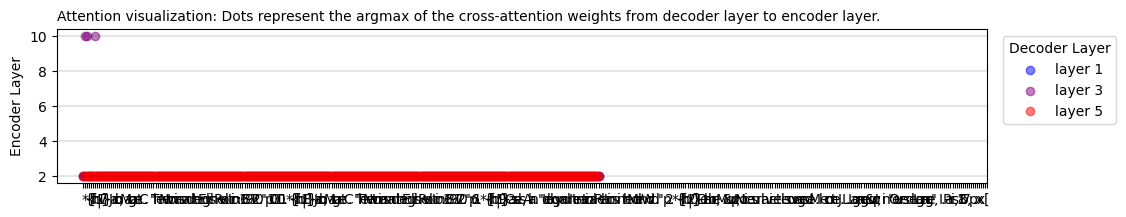

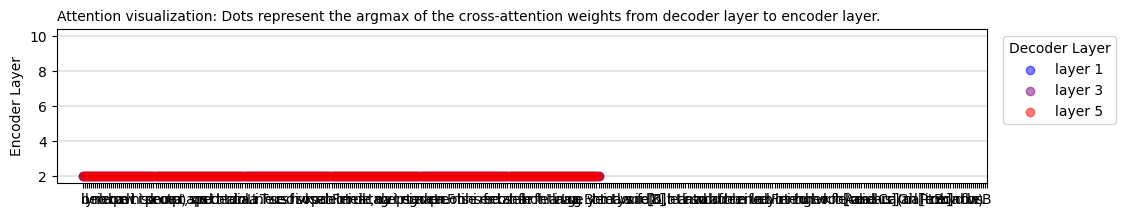

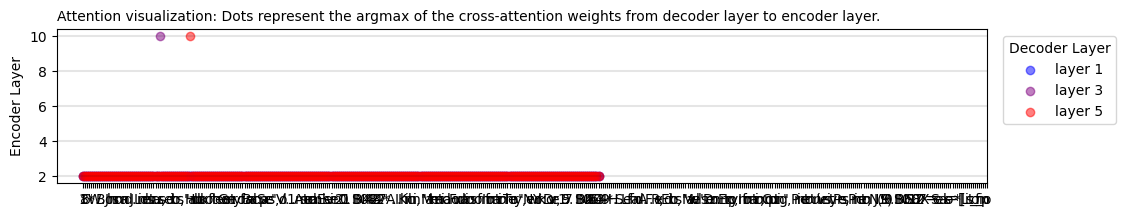

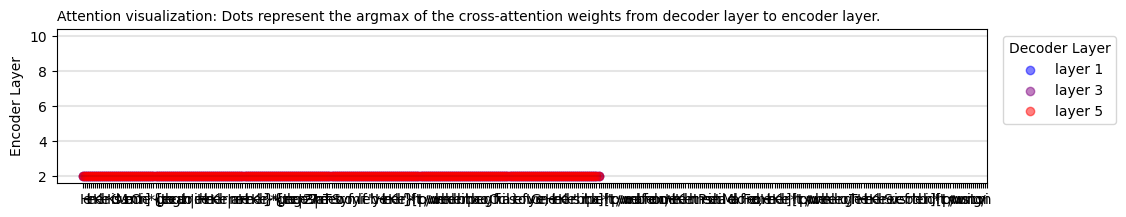

/home/mk/anaconda3/envs/moabb/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mk/anaconda3/envs/moabb/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


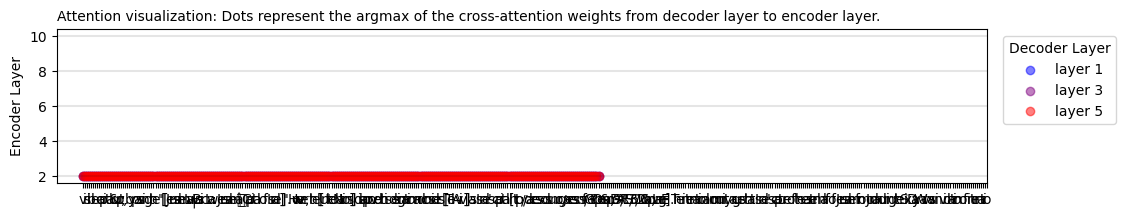

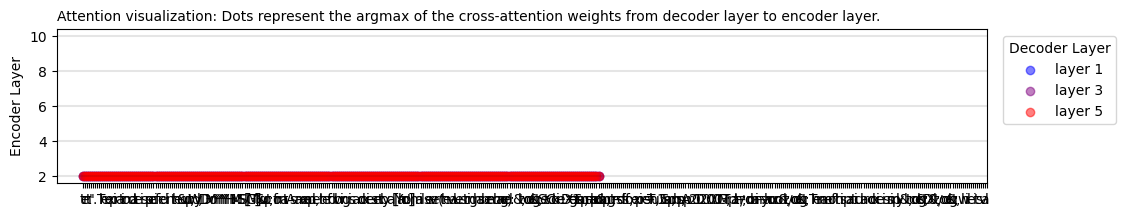

In [8]:
for ix in range(6):
        
    plt.figure(figsize=(12,2))
    plt.scatter(np.arange(batch_attn[0][ix].shape[0]), batch_attn[0][ix], c='blue', alpha=0.5, label='layer 1')
    plt.scatter(np.arange(batch_attn[1][ix].shape[0]), batch_attn[1][ix], c='purple', alpha=0.5, label='layer 3')
    plt.scatter(np.arange(batch_attn[2][ix].shape[0]), batch_attn[2][ix], c='red', alpha=0.5, label='layer 5')
    
    for i, _ in enumerate([2,4,6,8,10]): #range(12):
        plt.axhline(y=i, color='black', alpha=0.1)
    plt.ylabel("Encoder Layer")
    plt.yticks(ticks=range(len([2,4,6,8,10])), labels=[2,4,6,8,10])
    # xaxis ticks and label to top
    plt.xticks(np.arange(len(batch_tokens_Y[ix])), [parse_ascii(itos[i]) for i in batch_tokens_Y[ix]])
    
    plt.legend(title='Decoder Layer', bbox_to_anchor=(1.01, 1), loc='upper left')
    
    plt.title("Attention visualization: Dots represent the argmax of the cross-attention weights from decoder layer to encoder layer.", fontsize=10, loc='left')
    plt.show()